In [3]:
import tensorflow
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl

/home/mudassir/anaconda3/envs/snakes/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/mudassir/anaconda3/envs/snakes/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/mudassir/anaconda3/envs/snakes/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/mudassir/anaconda3/envs/snakes/lib

# loading data

In [4]:
dataset = pd.read_csv('CarPrice_Assignment.csv')

In [5]:
dataset = dataset.sample(frac=1)

In [6]:
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
81,82,3,mitsubishi g4,gas,std,two,hatchback,fwd,front,96.3,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8499.0
158,159,0,toyota corona,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.0
134,135,3,saab 99le,gas,std,two,hatchback,fwd,front,99.1,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.0
144,145,0,subaru r1,gas,std,four,sedan,4wd,front,97.0,...,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 81 to 194
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm     

# checking missing values

In [8]:
dataset.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# deleting uncessary data

In [10]:
dataset.drop(columns='car_ID', inplace=True)
dataset.drop(columns='CarName', inplace=True)
dataset.head(10)

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
81,3,gas,std,two,hatchback,fwd,front,96.3,173.0,65.4,...,122,2bbl,3.35,3.46,8.5,88,5000,25,32,8499.000
158,0,diesel,std,four,sedan,fwd,front,95.7,166.3,64.4,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898.000
134,3,gas,std,two,hatchback,fwd,front,99.1,186.6,66.5,...,121,mpfi,2.54,2.07,9.3,110,5250,21,28,15040.000
144,0,gas,std,four,sedan,4wd,front,97.0,172.0,65.4,...,108,2bbl,3.62,2.64,9.0,82,4800,24,25,9233.000
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.000
130,0,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,...,132,mpfi,3.46,3.90,8.7,90,5100,23,31,9295.000
109,0,gas,std,four,wagon,rwd,front,114.2,198.9,68.4,...,120,mpfi,3.46,3.19,8.4,97,5000,19,24,12440.000
9,0,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,17859.167
76,2,gas,std,two,hatchback,fwd,front,93.7,157.3,64.4,...,92,2bbl,2.97,3.23,9.4,68,5500,37,41,5389.000
37,0,gas,std,two,hatchback,fwd,front,96.5,167.5,65.2,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,7895.000


# one hot encoding

In [11]:
obj_cols = dataset.select_dtypes(include="object")

In [12]:
obj_cols.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
81,gas,std,two,hatchback,fwd,front,ohc,four,2bbl
158,diesel,std,four,sedan,fwd,front,ohc,four,idi
134,gas,std,two,hatchback,fwd,front,ohc,four,mpfi
144,gas,std,four,sedan,4wd,front,ohcf,four,2bbl
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in obj_cols:
    dataset.loc[:,cols] = le.fit_transform(dataset.loc[:,cols])

In [14]:
dataset.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
81,3,1,0,1,2,1,0,96.3,173.0,65.4,...,122,1,3.35,3.46,8.5,88,5000,25,32,8499.0
158,0,0,0,0,3,1,0,95.7,166.3,64.4,...,110,3,3.27,3.35,22.5,56,4500,34,36,7898.0
134,3,1,0,1,2,1,0,99.1,186.6,66.5,...,121,5,2.54,2.07,9.3,110,5250,21,28,15040.0
144,0,1,0,0,3,0,0,97.0,172.0,65.4,...,108,1,3.62,2.64,9.0,82,4800,24,25,9233.0
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0


In [15]:
dataset.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [16]:
dataset.describe()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.902439,0.180488,0.439024,2.614634,1.326829,0.014634,98.756585,174.049268,65.907805,...,126.907317,3.253659,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.497483,0.859081,0.556171,0.120377,6.021776,12.337289,2.145204,...,41.642693,2.013204,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,...,61.000000,0.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000,0.000000,94.500000,166.300000,64.100000,...,97.000000,1.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.000000,97.000000,173.200000,65.500000,...,120.000000,5.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,1.000000,0.000000,1.000000,3.000000,2.000000,0.000000,102.400000,183.100000,66.900000,...,141.000000,5.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,120.900000,208.100000,72.300000,...,326.000000,7.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# data spltting

In [17]:
target = dataset['price']

In [18]:
target.head()

81      8499.0
158     7898.0
134    15040.0
144     9233.0
1      16500.0
Name: price, dtype: float64

In [19]:
data =  dataset.drop(columns='price')

In [20]:
data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
81,3,1,0,1,2,1,0,96.3,173.0,65.4,...,2,122,1,3.35,3.46,8.5,88,5000,25,32
158,0,0,0,0,3,1,0,95.7,166.3,64.4,...,2,110,3,3.27,3.35,22.5,56,4500,34,36
134,3,1,0,1,2,1,0,99.1,186.6,66.5,...,2,121,5,2.54,2.07,9.3,110,5250,21,28
144,0,1,0,0,3,0,0,97.0,172.0,65.4,...,2,108,1,3.62,2.64,9.0,82,4800,24,25
1,3,1,0,1,0,2,0,88.6,168.8,64.1,...,2,130,5,3.47,2.68,9.0,111,5000,21,27


In [21]:
data.shape

(205, 23)

In [22]:
target.shape

(205,)

In [23]:
train_data = data.iloc[:102]
train_label = target.iloc[:102]

In [24]:
test_data = data.iloc[102:163]
test_label = target.iloc[102:163]

In [25]:
val_data = data.iloc[163:]
val_label = target.iloc[163:]

In [26]:
train_data.shape

(102, 23)

In [27]:
train_label.shape

(102,)

# data normalization

In [28]:
mean = train_data.mean()

In [29]:
std = train_data.std()

In [30]:
normalize_train_data = (train_data-mean)/std

In [31]:
normalize_train_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
81,1.856444,0.290296,-0.413187,1.055448,-0.678268,-0.610943,-0.099015,-0.382695,-0.068527,-0.287318,...,-0.024263,-0.100489,-1.017062,0.169263,0.592370,-0.395477,-0.400776,-0.376194,-0.058859,0.160748
158,-0.702438,-3.410983,-0.413187,-0.938176,0.455885,-0.610943,-0.099015,-0.478213,-0.585426,-0.724729,...,-0.024263,-0.388543,-0.052036,-0.135635,0.259217,3.433018,-1.220408,-1.448033,1.259000,0.711883
134,1.856444,0.290296,-0.413187,1.055448,-0.678268,-0.610943,-0.099015,0.063054,0.980702,0.193833,...,-0.024263,-0.124494,0.912990,-2.917830,-3.617463,-0.176706,0.162721,0.159725,-0.644574,-0.390387
144,-0.702438,0.290296,-0.413187,-0.938176,0.455885,-2.499313,-0.099015,-0.271258,-0.145676,-0.287318,...,-0.024263,-0.436552,-1.017062,1.198294,-1.891129,-0.258745,-0.554457,-0.804930,-0.205287,-0.803739
1,1.856444,0.290296,-0.413187,1.055448,-2.946574,1.277426,-0.099015,-1.608505,-0.392553,-0.855952,...,-0.024263,0.091547,0.912990,0.626610,-1.769982,-0.258745,0.188335,-0.376194,-0.644574,-0.528171


In [32]:
normalize_test_data = (test_data-mean)/std

In [33]:
normalize_test_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
167,1.003483,0.290296,-0.413187,1.055448,-1.812421,1.277426,-0.099015,-0.048383,0.178351,-0.199836,...,-0.024263,0.475619,0.912990,1.198294,0.713516,-0.176706,0.316402,-0.804930,-0.205287,-0.114820
40,-0.702438,0.290296,-0.413187,-0.938176,0.455885,-0.610943,-0.099015,-0.350856,0.116631,-1.555808,...,-0.024263,-0.388543,-1.499575,-0.592982,0.955808,-0.258745,-0.452003,1.338748,0.233999,0.298532
15,-0.702438,0.290296,-0.413187,-0.938176,0.455885,1.277426,-0.099015,0.763517,1.165860,0.368797,...,1.213159,1.987902,0.912990,1.198294,0.380364,-0.532209,2.006893,0.481277,-1.376717,-1.217090
197,-1.555399,0.290296,-0.413187,-0.938176,1.590038,1.277426,-0.099015,0.890874,1.150430,0.500020,...,-0.024263,0.355596,0.912990,1.808091,-0.346514,-0.122013,0.265175,0.481277,-0.205287,-0.390387
164,0.150523,0.290296,-0.413187,1.055448,-0.678268,1.277426,-0.099015,-0.669248,-0.400268,-0.899693,...,-0.024263,-0.676597,-1.017062,-0.440533,-0.709953,-0.258745,-0.861819,-0.804930,0.526856,0.436315


In [34]:
normalize_val_data = (val_data-mean)/std

In [35]:
normalize_val_data.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
85,0.150523,0.290296,-0.413187,-0.938176,0.455885,-0.610943,-0.099015,-0.382695,-0.114816,-0.287318,...,-0.024263,-0.100489,-1.017062,0.169263,0.592370,-0.395477,-0.400776,-0.376194,-0.058859,0.160748
125,1.856444,0.290296,-0.413187,1.055448,-0.678268,1.277426,-0.099015,-0.669248,-0.384838,0.981171,...,-0.024263,0.595641,0.912990,2.417887,-0.467660,-0.122013,1.007967,0.695644,-0.937431,-0.528171
138,1.003483,0.290296,-0.413187,1.055448,-0.678268,-0.610943,-0.099015,-0.796605,-1.310628,-1.162139,...,-0.024263,-0.700602,-1.017062,1.198294,-2.739152,-0.258745,-0.887433,-0.590562,0.819714,0.711883
174,-1.555399,-3.410983,2.396484,-0.938176,0.455885,-0.610943,-0.099015,0.588401,0.132061,0.193833,...,-0.024263,-0.388543,-0.052036,-0.135635,0.259217,3.433018,-0.784979,-1.448033,0.673285,0.298532
16,-0.702438,0.290296,-0.413187,1.055448,0.455885,1.277426,-0.099015,0.763517,1.536176,0.806207,...,1.213159,1.987902,0.912990,1.198294,0.380364,-0.532209,2.006893,0.481277,-1.376717,-1.217090


In [36]:
normalize_train_data.shape

(102, 23)

In [37]:
normalize_test_data.shape

(61, 23)

In [38]:
normalize_val_data.shape

(42, 23)

In [39]:

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# creating model

In [40]:
model = keras.Sequential()

In [41]:
model.add(layers.Dense(16, activation="relu", kernel_regularizer=regularizers.l2(0.001), 
                       input_shape=(normalize_train_data.shape[1],)))
model.add(layers.Dense(10,activation="relu"))
model.add(layers.Dense(8,activation="relu"))
model.add(layers.Dense(6,activation="relu"))
model.add(layers.Dense(1,))

# compilation

In [42]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [43]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 54        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 7         
Total params: 703
Trainable params: 703
Non-trainable params: 0
_________________________________________________________________


# model training

In [44]:
history = model.fit(normalize_train_data,train_label, batch_size=16, epochs=100, 
                    validation_data=(normalize_val_data, val_label))

Train on 102 samples, validate on 42 samples
Epoch 1/100
102/102 [==============================] - 1s 6ms/step - loss: 235405749.6471 - mean_absolute_error: 13162.5789 - val_loss: 293013571.0476 - val_mean_absolute_error: 13917.0722
Epoch 2/100
102/102 [==============================] - 0s 559us/step - loss: 235394519.8431 - mean_absolute_error: 13162.2793 - val_loss: 293001252.5714 - val_mean_absolute_error: 13916.7685
Epoch 3/100
102/102 [==============================] - 0s 436us/step - loss: 235380655.6863 - mean_absolute_error: 13161.9183 - val_loss: 292986438.0952 - val_mean_absolute_error: 13916.4009
Epoch 4/100
102/102 [==============================] - 0s 494us/step - loss: 235365971.4510 - mean_absolute_error: 13161.5065 - val_loss: 292967759.2381 - val_mean_absolute_error: 13915.9333
Epoch 5/100
102/102 [==============================] - 0s 563us/step - loss: 235346772.3922 - mean_absolute_error: 13160.9872 - val_loss: 292945020.9524 - val_mean_absolute_error: 13915.3527
Ep

102/102 [==============================] - 0s 766us/step - loss: 162462749.4902 - mean_absolute_error: 11001.6531 - val_loss: 205617863.6190 - val_mean_absolute_error: 11564.6484
Epoch 44/100
102/102 [==============================] - 0s 551us/step - loss: 154576930.9804 - mean_absolute_error: 10741.0639 - val_loss: 196502867.8095 - val_mean_absolute_error: 11284.1299
Epoch 45/100
102/102 [==============================] - 0s 617us/step - loss: 146568414.5882 - mean_absolute_error: 10460.3910 - val_loss: 187317924.5714 - val_mean_absolute_error: 10990.1896
Epoch 46/100
102/102 [==============================] - 0s 584us/step - loss: 138825227.1373 - mean_absolute_error: 10170.7943 - val_loss: 177771294.4762 - val_mean_absolute_error: 10673.5386
Epoch 47/100
102/102 [==============================] - 0s 544us/step - loss: 130457566.4314 - mean_absolute_error: 9858.3845 - val_loss: 168067116.9524 - val_mean_absolute_error: 10339.0967
Epoch 48/100
102/102 [==============================] 

102/102 [==============================] - 0s 910us/step - loss: 18917867.9608 - mean_absolute_error: 3452.6084 - val_loss: 35734633.6190 - val_mean_absolute_error: 4553.6005
Epoch 87/100
102/102 [==============================] - 0s 1ms/step - loss: 18621239.4118 - mean_absolute_error: 3428.9035 - val_loss: 35197673.8095 - val_mean_absolute_error: 4521.5672
Epoch 88/100
102/102 [==============================] - 0s 893us/step - loss: 18314722.0392 - mean_absolute_error: 3405.1464 - val_loss: 34740680.8571 - val_mean_absolute_error: 4487.7974
Epoch 89/100
102/102 [==============================] - 0s 731us/step - loss: 18006377.2451 - mean_absolute_error: 3381.3305 - val_loss: 34212078.9524 - val_mean_absolute_error: 4449.3896
Epoch 90/100
102/102 [==============================] - 0s 415us/step - loss: 17684857.1765 - mean_absolute_error: 3350.1574 - val_loss: 33824023.4286 - val_mean_absolute_error: 4413.6251
Epoch 91/100
102/102 [==============================] - 0s 427us/step - los

In [45]:
model.evaluate(test_data,test_label)

61/61 [==============================] - 0s 341us/step


[17249750792359.87, 4123654.6967213117]

In [46]:
hisory_dictionary = history.history

In [47]:
hisory_dictionary

{'loss': [235405749.6470588,
  235394519.84313726,
  235380655.6862745,
  235365971.4509804,
  235346772.39215687,
  235326094.74509802,
  235294388.39215687,
  235261244.2352941,
  235218689.56862745,
  235169239.52941176,
  235105242.3529412,
  235024037.49019608,
  234933446.5882353,
  234820477.49019608,
  234680970.03921568,
  234508092.2352941,
  234299501.80392158,
  234039065.88235295,
  233718505.0980392,
  233364796.2352941,
  232897185.25490198,
  232323147.29411766,
  231685050.98039216,
  230949391.05882353,
  230026341.01960784,
  229066385.25490198,
  227778311.21568626,
  226325752.15686274,
  224536053.01960784,
  222679399.21568626,
  220353817.4117647,
  217771766.9019608,
  214874769.4117647,
  211412458.03921568,
  207788062.43137255,
  203318907.60784313,
  199293485.33333334,
  193708617.0980392,
  188455445.33333334,
  182341212.8627451,
  176582490.98039216,
  169598667.92156863,
  162462749.49019608,
  154576930.98039216,
  146568414.5882353,
  138825227.13725

# graph

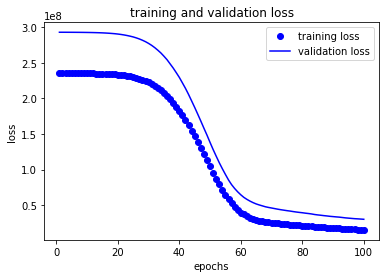

In [48]:
import matplotlib.pyplot as plt
loss_Values = hisory_dictionary["loss"]
val_loss_values = hisory_dictionary["val_loss"]
epochs = range(1, len(loss_Values) + 1)
plt.plot(epochs, loss_Values, 'bo', label="training loss")
plt.plot(epochs, val_loss_values,'b', label="validation loss")
plt.title("training and validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()
